In [112]:
import pickle
import pprint
import glob
import pandas as pd
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pp = pprint.PrettyPrinter(depth=6)
pp = pprint.PrettyPrinter(depth=6)
pd.set_option('max_colwidth',400)
pd.set_option('max_rows',200)

In [113]:
csv_folder = "../../csv"
pkl_folder = "../../pkl"

In [114]:
import git
git = git.Git("../../../sonarqube/") 

### Import df

In [115]:
jobsDf = pd.read_csv(f"{csv_folder}/allJobs.csv", index_col=0)

In [116]:
tagsDf = pd.read_csv(f"{csv_folder}/tags.csv", index_col=0)
tagsDf.Date = pd.to_datetime(tagsDf.Date)

In [117]:
tagsDf_travis = tagsDf[tagsDf.Date > pd.to_datetime(datetime.date(2015,3,10))]

### (1) Problem with our ordering
remove RC and M from name and order by Tag and Date

Downloaded 0 comparisons...
Comparing 2.10 and 2.10.1...
Comparing 2.10.1 and 2.11...
Comparing 2.11 and 2.12...
Comparing 2.12 and 2.13...
Comparing 2.13 and 2.13.1...
Comparing 2.13.1 and 2.14...
Comparing 2.14 and 2.6...
Comparing 2.6 and 2.7...
Comparing 2.7 and 2.8...
Comparing 2.8 and 2.9...
Comparing 2.9 and 3.0...
Comparing 3.0 and 3.0.1...
Comparing 3.0.1 and 3.1...
Comparing 3.1 and 3.1.1...
Comparing 3.1.1 and 3.2...
Comparing 3.2 and 3.2.1...
Comparing 3.2.1 and 3.3...
Comparing 3.3 and 3.3.1...
Comparing 3.3.1 and 3.3.2...
Comparing 3.3.2 and 3.4...
Comparing 3.4 and 3.4.1...
Comparing 3.4.1 and 3.5...
Comparing 3.5 and 3.5.1...
Comparing 3.5.1 and 3.6...
Comparing 3.6 and 3.6.1...
Comparing 3.6.1 and 3.6.2...
Comparing 3.6.2 and 3.6.3...
Comparing 3.6.3 and 3.7...
Comparing 3.7 and 3.7.1-RC1-...
Comparing 3.7.1-RC1- and 3.7.1...
Comparing 3.7.1 and 3.7.2...
Comparing 3.7.2 and 3.7.4...
Comparing 3.7.4 and 4.0...
Comparing 4.0 and 4.1-RC1...
Comparing 4.1-RC1 and 4.1-RC2...
Comparing 4.1-RC2 and 4.1...
Comparing 4.1 and 4.1.1...
Comparing 4.1.1 and 4.1.2...
Comparing 4.1.2 and 4.2...
Comparing 4.2 and 4.3...
Comparing 4.3 and 4.3.1...
Comparing 4.3.1 and 4.3.2...
Comparing 4.3.2 and 4.3.3...
Comparing 4.3.3 and 4.4-RC1...
Comparing 4.4-RC1 and 4.4-RC2...
Comparing 4.4-RC2 and 4.4-RC3...
Comparing 4.4-RC3 and 4.4...
Comparing 4.4 and 4.4.1...
Comparing 4.4.1 and 4.5-RC1...
Comparing 4.5-RC1 and 4.5-RC2...
Downloaded 50 comparisons...
Comparing 4.5-RC2 and 4.5-RC3...
Comparing 4.5-RC3 and 4.5...
Comparing 4.5 and 4.5.1-RC1...
Comparing 4.5.1-RC1 and 4.5.1...
Comparing 4.5.1 and 4.5.2...
Comparing 4.5.2 and 4.5.3...
Comparing 4.5.3 and 4.5.4...
Comparing 4.5.4 and 4.5.5...
Comparing 4.5.5 and 4.5.6...
Comparing 4.5.6 and 4.5.7...
Comparing 4.5.7 and 5.0-RC1...
Comparing 5.0-RC1 and 5.0-RC2...
Comparing 5.0-RC2 and 5.0-RC3...
Comparing 5.0-RC3 and 5.0-RC4...
Comparing 5.0-RC4 and 5.0...
Comparing 5.0 and 5.0.1...
Comparing 5.0.1 and 5.1-RC1...
Comparing 5.1-RC1 and 5.1-RC2...
Comparing 5.1-RC2 and 5.1...
Comparing 5.1 and 5.1.1...
Comparing 5.1.1 and 5.1.2...
Comparing 5.1.2 and 5.2-RC1...
Comparing 5.2-RC1 and 5.2-RC2...
Comparing 5.2-RC2 and 5.2-RC3...
Comparing 5.2-RC3 and 5.2...
Comparing 5.2 and 5.3-RC1...
Comparing 5.3-RC1 and 5.3-RC2...
Comparing 5.3-RC2 and 5.3-RC3...
Comparing 5.3-RC3 and 5.3...
Comparing 5.3 and 5.4-M2...
Comparing 5.4-M2 and 5.4-M3...
Comparing 5.4-M3 and 5.4-M4...
Comparing 5.4-M4 and 5.4-M5...
Comparing 5.4-M5 and 5.4-M7...
Comparing 5.4-M7 and 5.4-M6...
Comparing 5.4-M6 and 5.4-M8...
Comparing 5.4-M8 and 5.4-M9...
Comparing 5.4-M9 and 5.4-M10...
Comparing 5.4-M10 and 5.4-M11...
Comparing 5.4-M11 and 5.4-M12...
Comparing 5.4-M12 and 5.4-M13...
Comparing 5.4-M13 and 5.4-RC1...
Comparing 5.4-RC1 and 5.4-M14...
Comparing 5.4-M14 and 5.4-M1...
Comparing 5.4-M1 and 5.4-RC2...
Comparing 5.4-RC2 and 5.4-RC3...
Comparing 5.4-RC3 and 5.4-RC4...
Comparing 5.4-RC4 and 5.4...
Comparing 5.4 and 5.5-M1...
Comparing 5.5-M1 and 5.5-M2...
Downloaded 100 comparisons...
Comparing 5.5-M2 and 5.5-M3...
Comparing 5.5-M3 and 5.5-M4...
Comparing 5.5-M4 and 5.5-M5...
Comparing 5.5-M5 and 5.5-M6...
Comparing 5.5-M6 and 5.5-M7...
Comparing 5.5-M7 and 5.5-M10...
Comparing 5.5-M10 and 5.5-M11...
Comparing 5.5-M11 and 5.5-M12...
Comparing 5.5-M12 and 5.5-M13...
Comparing 5.5-M13 and 5.5-M14...
Comparing 5.5-M14 and 5.5-RC1...
Comparing 5.5-RC1 and 5.5-RC2...
Comparing 5.5-RC2 and 5.5...
Comparing 5.5 and 5.6-RC1...
Comparing 5.6-RC1 and 5.6-RC2...
Comparing 5.6-RC2 and 5.6...
Comparing 5.6 and 5.6.1...
Comparing 5.6.1 and 5.6.2...
Comparing 5.6.2 and 5.6.3...
Comparing 5.6.3 and 5.6.4...
Comparing 5.6.4 and 5.6.5...
Comparing 5.6.5 and 5.6.6...
Comparing 5.6.6 and 5.6.7...
Comparing 5.6.7 and 6.0-RC1...
Comparing 6.0-RC1 and 6.0-RC2...
Comparing 6.0-RC2 and 6.0...
Comparing 6.0 and 6.1-RC1...
Comparing 6.1-RC1 and 6.1-RC2...
Comparing 6.1-RC2 and 6.1...
Comparing 6.1 and 6.1.1...
Comparing 6.1.1 and 6.2-RC1...
Comparing 6.2-RC1 and 6.2-RC2...
Comparing 6.2-RC2 and 6.2-RC3...
Comparing 6.2-RC3 and 6.2...
Comparing 6.2 and 6.2.1...
Comparing 6.2.1 and 6.3-RC1...
Comparing 6.3-RC1 and 6.3-RC4...
Comparing 6.3-RC4 and 6.3...
Comparing 6.3 and 6.3.0.18401...
Comparing 6.3.0.18401 and 6.3.0.18587...
Comparing 6.3.0.18587 and 6.3.0.18800...
Comparing 6.3.0.18800 and 6.3.1...
Comparing 6.3.1 and 6.3.2...
Comparing 6.3.2 and 6.4-RC1...
Comparing 6.4-RC1 and 6.4-RC2...
Comparing 6.4-RC2 and 6.4-RC3...
Comparing 6.4-RC3 and 6.4...
Comparing 6.4 and 6.5-M1...
Comparing 6.5-M1 and 6.5-M2...
Comparing 6.5-M2 and 6.5-RC1...
Downloaded 150 comparisons...
Comparing 6.5-RC1 and 6.5-M3...
Comparing 6.5-M3 and 6.5-RC2...
Comparing 6.5-RC2 and 6.5-M4...
Comparing 6.5-M4 and 6.5...
Comparing 6.5 and 6.6-RC1...
Comparing 6.6-RC1 and 6.6...
Comparing 6.6 and 6.7-RC1...
Comparing 6.7-RC1 and 6.7...
Comparing 6.7 and 6.7.1...
Comparing 6.7.1 and 6.7.2...
Comparing 6.7.2 and 6.7.3...
Comparing 6.7.3 and 6.7.4...
Comparing 6.7.4 and 6.7.5...
Comparing 6.7.5 and 6.7.6...
Comparing 6.7.6 and 6.7.7...
Comparing 6.7.7 and 7.0-RC1...
Comparing 7.0-RC1 and 7.0...
Comparing 7.0 and 7.5...
Comparing 7.5 and 7.6...
Comparing 7.6 and 7.7...
Comparing 7.7 and 7.8...
Comparing 7.8 and 7.9...
Comparing 7.9 and 7.9.1...
Comparing 7.9.1 and 7.9.2...
Comparing 7.9.2 and 7.9.3...
Comparing 7.9.3 and 7.9.4...
Comparing 7.9.4 and 8.0...
Comparing 8.0 and 8.1.0.31237...
Comparing 8.1.0.31237 and 8.2.0.32929...
Comparing 8.2.0.32929 and 8.3.0.34182...
Comparing 8.3.0.34182 and 8.3.1.34397...
Comparing 8.3.1.34397 and 8.4.0.35506...
Comparing 8.4.0.35506 and 8.4.1.35646...
Comparing 8.4.1.35646 and 8.4.2.36762...
Comparing 8.4.2.36762 and latest-silver-master-#65...

* '2.14', -> tagged much later
* '4.5.4', -> seems a github error. 4.5.5 points to a commit sha cc8 which is visible here (1) https://github.com/SonarSource/sonarqube/compare/4.5.4...4.5.6 but https://github.com/SonarSource/sonarqube/compare/4.5.4...4.5.5 compares the same sha and says they are identical. Solution Take list from (1) up to cc8a947. Because there is a branch with that name. This has been reported to Github. Use sha instead
* '5.4-M14', -> compared with 5.4.M1 but they have the same sha.
* '5.4-M7', -> tag 5.4-M6 has been created the day after M7 but when compared with M7 and M8 it looks like the order is the intuitive M6->M7->M8
* '6.3',
* '6.7',
* '8.4.2.36762',
* 'latest-silver-master-#65'}

### (2) Import tag comparisons NO SHA

In [118]:
comp_files = glob.glob(f"{pkl_folder}/compare_tags_not_sha/*.pkl")
comp_raw = []
for comp_file in comp_files:
    with open(comp_file, "rb") as f:
        comp_raw = comp_raw + pickle.load(f)

In [119]:
len(comp_raw)

2525

In [120]:
comp_combination_data = []
for comp in comp_raw:
    if not "url" in comp:
        continue
    from_tag = comp["url"].split("...")[0].split("/")[-1]
    to_tag = comp["url"].split("...")[1]
    comp_combination_data.append((from_tag, to_tag, comp["ahead_by"], comp["behind_by"]))

In [121]:
comp_comb_tags_df = pd.DataFrame(comp_combination_data, columns=["from_tag", "to_tag", "ahead_by", "behind_by"])
#comp_comb_tags_df.to_csv(f"{csv_folder}/compare_tags_no_sha.csv")
comp_comb_tags_df

,from_tag,to_tag,ahead_by,behind_by
0,5.5-M2,5.4,20,66
1,5.4-M13,5.4,55,0
2,5.5-M4,5.4,17,97
3,5.4-RC1,5.4,33,0
4,5.5-M1,5.4,22,36
...,...,...,...,...
2216,5.3,5.4-M3,67,6
2217,5.4-M4,5.4-M3,0,40
2218,5.2-RC3,5.4-M3,653,0
2219,5.3-RC1,5.4-M3,110,1


In [122]:
set(tagsDf.Tag.unique()) - set(comp_comb_tags_df.from_tag.unique())

{'8.2.0.32929',
 '8.3.0.34182',
 '8.3.1.34397',
 '8.4.0.35506',
 '8.4.1.35646',
 '8.4.2.36762',
 'latest-silver-master-#65'}

with open(f"{pkl_folder}/compare_tags_combination.pkl", "rb") as f:
        comp_raw = pickle.load(f)

In [123]:
tagsUnique = tagsDf_travis.Tag.unique()

In [124]:
comp_comb_tags_df = comp_comb_tags_df[comp_comb_tags_df.from_tag.isin(tagsUnique)]

In [125]:
grp = comp_comb_tags_df[comp_comb_tags_df.behind_by == 0].groupby("to_tag").idxmin()
comp_comb_tags_df.loc[grp.ahead_by]

,from_tag,to_tag,ahead_by,behind_by
2076,4.5.5,4.5.4,0,0
310,4.5.5,4.5.6,29,0
427,4.5.6,4.5.7,7,0
1980,5.1-RC2,5.1,17,0
189,5.1-RC2,5.1.1,24,0
298,5.1-RC2,5.1.2,36,0
315,5.2-RC3,5.2,31,0
142,5.1.2,5.2-RC1,2762,0
30,5.2-RC1,5.2-RC2,4,0
434,5.2-RC2,5.2-RC3,56,0


Problem: 6.7 compared with 6.7.1 instead of 6.7-RC1 see https://github.community/t/compare-tags-uses-the-branch-instead/136343
Solution: use sha (3)

### (3) Import tag comparisons with sha

In [126]:
comp_files = glob.glob(f"{pkl_folder}/compare_tags/*.pkl")
comp_raw = []
for comp_file in comp_files:
    with open(comp_file, "rb") as f:
        comp_raw = comp_raw + pickle.load(f)

In [127]:
pp.pprint(comp_raw[0])

{'ahead_by': 490,
 'base_commit': {'author': {'avatar_url': 'https://avatars1.githubusercontent.com/u/414010?v=4',
                            'events_url': 'https://api.github.com/users/simonbrandhof/events{/privacy}',
                            'followers_url': 'https://api.github.com/users/simonbrandhof/followers',
                            'following_url': 'https://api.github.com/users/simonbrandhof/following{/other_user}',
                            'gists_url': 'https://api.github.com/users/simonbrandhof/gists{/gist_id}',
                            'gravatar_id': '',
                            'html_url': 'https://github.com/simonbrandhof',
                            'id': 414010,
                            'login': 'simonbrandhof',
                            'node_id': 'MDQ6VXNlcjQxNDAxMA==',
                            'organizations_url': 'https://api.github.com/users/simonbrandhof/orgs',
                            'received_events_url': 'https://api.github.com/users

                     '-          (Class) CeDistributedInformationImpl.class);\n'
                     '-    underTest.stop();\n'
                     '-  }\n'
                     '-\n'
                     '-  @Test\n'
                     '-  public void real_start_without_cluster() throws '
                     'IOException {\n'
                     '-    Properties properties = getProperties();\n'
                     '-\n'
                     '-    // required persisted properties\n'
                     '-    insertProperty(CoreProperties.SERVER_ID, '
                     '"a_startup_id");\n'
                     '+    insertProperty(CoreProperties.SERVER_ID, '
                     '"a_server_id");\n'
                     '     insertProperty(CoreProperties.SERVER_STARTTIME, '
                     'DateUtils.formatDateTime(new Date()));\n'
                     '+    '
                     'insertInternalProperty(InternalProperties.SERVER_ID_CHECKSUM, '
                     'Dige

                     '     } catch (NoSuchFieldException | '
                     'IllegalAccessException e) {\n'
                     '-      LOG.debug("Failed to check the autocommit status '
                     'of SqlSession", e);\n'
                     '+      LOG.debug("Failed to check the autocommit status '
                     'of SqlSession: {}", e);\n'
                     '     }\n'
                     '   }\n'
                     ' ',
            'raw_url': 'https://github.com/SonarSource/sonarqube/raw/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-db-dao/src/main/java/org/sonar/db/DBSessionsImpl.java',
            'sha': '96832a52d39bff1a5e35652b7f03235c5ae50b8c',
            'status': 'modified'},
           {'additions': 2,
            'blob_url': 'https://github.com/SonarSource/sonarqube/blob/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-db-dao/src/main/java/org/sonar/db/DaoModule.java',
            'changes': 2,
            'contents_url': 'https://

            'raw_url': 'https://github.com/SonarSource/sonarqube/raw/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-db-dao/src/main/java/org/sonar/db/issue/IssueDao.java',
            'sha': 'ab8ccd3871f2cd54a18b7f82c91571d9ef3d2e98',
            'status': 'modified'},
           {'additions': 2,
            'blob_url': 'https://github.com/SonarSource/sonarqube/blob/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-db-dao/src/main/java/org/sonar/db/issue/IssueDto.java',
            'changes': 3,
            'contents_url': 'https://api.github.com/repos/SonarSource/sonarqube/contents/server/sonar-db-dao/src/main/java/org/sonar/db/issue/IssueDto.java?ref=ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1',
            'deletions': 1,
            'filename': 'server/sonar-db-dao/src/main/java/org/sonar/db/issue/IssueDto.java',
            'patch': '@@ -51,6 +51,7 @@\n'
                     ' \n'
                     ' public final class IssueDto implements Serializable {\n'
             

            'deletions': 3,
            'filename': 'server/sonar-db-dao/src/main/resources/org/sonar/db/component/SnapshotMapper.xml',
            'patch': '@@ -11,7 +11,7 @@\n'
                     '     s.status as status,\n'
                     '     s.purge_status as purgeStatus,\n'
                     '     s.islast as last,\n'
                     '-    s.version as version,\n'
                     '+    s.version as rawVersion,\n'
                     '     s.period1_mode as periodMode,\n'
                     '     s.period1_param as periodParam,\n'
                     '     s.period1_date as periodDate\n'
                     '@@ -104,10 +104,11 @@\n'
                     '     <include refid="snapshotColumns" />\n'
                     '     from snapshots s\n'
                     '       inner join projects p on p.uuid=s.component_uuid '
                     'and p.enabled=${_true}\n'
                     '-      inner join ce_activity ca on s.uuid = '
                 

                     '+    db.components().insertComponent(file1InModule);\n'
                     '+    ComponentDto file2InModule = newFileDto(module, '
                     'null, FILE_3_UUID).setDbKey("file-key-3").setName("File '
                     'Three");\n'
                     '+    db.components().insertComponent(file2InModule);\n'
                     '     db.commit();\n'
                     ' \n'
                     '     // test children of root\n'
                     '@@ -1344,6 +1421,16 @@ public void '
                     'select_descendants_with_children_stragegy() {\n'
                     '     // test children of leaf component (file here), '
                     'matching name\n'
                     '     query = '
                     'newTreeQuery(FILE_1_UUID).setNameOrKeyQuery("Foo").build();\n'
                     '     assertThat(underTest.selectDescendants(dbSession, '
                     'query)).isEmpty();\n'
                     '+\n'
          

                     'assertThat(conf.maxLiveDateOfInactiveShortLivingBranches().get().getTime()).isBetween(tenDaysAgo '
                     '- 5000, tenDaysAgo + 5000);\n'
                     '   }\n'
                     ' \n'
                     '   @Test\n'
                     '   public void should_calculate_branch_purge_date() {\n'
                     '-    PurgeConfiguration conf = new '
                     'PurgeConfiguration(new IdUuidPair(1L, "1"), new '
                     'String[0], 30, Optional.empty(), System2.INSTANCE, '
                     'Collections.emptyList());\n'
                     '+    PurgeConfiguration conf = new '
                     'PurgeConfiguration(new IdUuidPair(1L, "1"), emptyList(), '
                     '30, Optional.empty(), System2.INSTANCE, emptyList());\n'
                     '     '
                     'assertThat(conf.maxLiveDateOfInactiveShortLivingBranches()).isEmpty();\n'
                     '   }\n'
                     ' \n

            'patch': '@@ -144,17 +144,12 @@ public Long read(Row row) throws '
                     'SQLException {\n'
                     '   RowReader<Long> LONG_READER = new LongReader();\n'
                     ' \n'
                     '   class StringReader implements RowReader<String> {\n'
                     '-    private StringReader() {\n'
                     '-    }\n'
                     '-\n'
                     '     @Override\n'
                     '     public String read(Row row) throws SQLException {\n'
                     '       return row.getNullableString(1);\n'
                     '     }\n'
                     '   }\n'
                     ' \n'
                     '-  RowReader<String> STRING_READER = new '
                     'StringReader();\n'
                     '-\n'
                     '   @FunctionalInterface\n'
                     '   interface RowHandler {\n'
                     '     void handle(Row row) throws SQLException;',
        

                     '+\n'
                     '+public class DbVersion67 implements DbVersion {\n'
                     '+  @Override\n'
                     '+  public void addSteps(MigrationStepRegistry registry) '
                     '{\n'
                     '+    registry\n'
                     '+      .add(1830, "Copy deprecated server ID", '
                     'CopyDeprecatedServerId.class)\n'
                     '+      .add(1831, "Add '
                     'webhook_deliveries.analysis_uuid", '
                     'AddAnalysisUuidToWebhookDeliveries.class)\n'
                     '+      .add(1832, "Create table ANALYSIS_PROPERTIES", '
                     'CreateTableAnalysisProperties.class)\n'
                     '+      .add(1833, "Cleanup disabled users", '
                     'CleanupDisabledUsers.class)\n'
                     '+      .add(1834, "Set WEBHOOK_DELIVERIES.CE_TASK_UUID '
                     'as nullable", '
                     'UpdateCeTaskUuid

                     '   @Rule\n'
                     '-  public CoreDbTester db = '
                     'CoreDbTester.createForSchema(AddUuidColumnsToResourceIndexTest.class, '
                     '"old_resourceindex.sql");\n'
                     '+  public final CoreDbTester db = '
                     'CoreDbTester.createForSchema(AddAnalysisUuidToWebhookDeliveriesTest.class, '
                     '"initial.sql");\n'
                     '   @Rule\n'
                     '   public ExpectedException expectedException = '
                     'ExpectedException.none();\n'
                     ' \n'
                     '-  private AddUuidColumnsToResourceIndex underTest = new '
                     'AddUuidColumnsToResourceIndex(db.database());\n'
                     '+  private AddAnalysisUuidToWebhookDeliveries underTest '
                     '= new '
                     'AddAnalysisUuidToWebhookDeliveries(db.database());\n'
                     ' \n'
                     '

            'deletions': 0,
            'filename': 'server/sonar-db-migration/src/test/resources/org/sonar/server/platform/db/migration/version/v67/MigratePreviousAnalysisToPreviousVersionTest/properties.sql',
            'patch': '@@ -0,0 +1,11 @@\n'
                     '+CREATE TABLE "PROPERTIES" (\n'
                     '+  "ID" INTEGER NOT NULL GENERATED BY DEFAULT AS '
                     'IDENTITY (START WITH 1, INCREMENT BY 1),\n'
                     '+  "PROP_KEY" VARCHAR(512) NOT NULL,\n'
                     '+  "RESOURCE_ID" INTEGER,\n'
                     '+  "USER_ID" INTEGER,\n'
                     '+  "IS_EMPTY" BOOLEAN NOT NULL,\n'
                     '+  "TEXT_VALUE" VARCHAR(4000),\n'
                     '+  "CLOB_VALUE" CLOB,\n'
                     '+  "CREATED_AT" BIGINT\n'
                     '+);\n'
                     '+CREATE INDEX "PROPERTIES_KEY" ON "PROPERTIES" '
                     '("PROP_KEY");',
            'raw_url': 'https://github.com/Sonar

           {'additions': 2,
            'blob_url': 'https://github.com/SonarSource/sonarqube/blob/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-process/src/main/java/org/sonar/process/ProcessEntryPoint.java',
            'changes': 4,
            'contents_url': 'https://api.github.com/repos/SonarSource/sonarqube/contents/server/sonar-process/src/main/java/org/sonar/process/ProcessEntryPoint.java?ref=ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1',
            'deletions': 2,
            'filename': 'server/sonar-process/src/main/java/org/sonar/process/ProcessEntryPoint.java',
            'patch': '@@ -99,14 +99,14 @@ public void launch(Monitored mp) {\n'
                     '     try {\n'
                     '       launch(logger);\n'
                     '     } catch (Exception e) {\n'
                     '-      logger.warn("Fail to start " + getKey(), e);\n'
                     '+      logger.warn("Fail to start {}", getKey(), e);\n'
                     '     } finally {\n

                     '+        Optional<String> redirectTo = '
                     'oAuthRedirection.getAndDelete(request, response);\n'
                     '+        '
                     'getResponse().sendRedirect(redirectTo.orElse(server.getContextPath() '
                     '+ "/"));\n'
                     '       } catch (IOException e) {\n'
                     '         throw new IllegalStateException("Fail to '
                     'redirect to home", e);\n'
                     '       }',
            'raw_url': 'https://github.com/SonarSource/sonarqube/raw/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-server/src/main/java/org/sonar/server/authentication/OAuth2ContextFactory.java',
            'sha': 'b8fdec59f8c06b65cd43df89a9376ade47ddd9b2',
            'status': 'modified'},
           {'additions': 78,
            'blob_url': 'https://github.com/SonarSource/sonarqube/blob/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-server/src/main/java/org/sonar/se

                     ' import org.sonar.api.resources.Qualifiers;\n'
                     '+import org.sonar.api.resources.Scopes;\n'
                     ' import org.sonar.api.server.ServerSide;\n'
                     ' import org.sonar.ce.queue.CeQueue;\n'
                     ' import org.sonar.ce.queue.CeTask;\n'
                     '@@ -50,11 +45,16 @@\n'
                     ' import org.sonar.db.permission.OrganizationPermission;\n'
                     ' import org.sonar.server.component.ComponentUpdater;\n'
                     ' import org.sonar.server.component.NewComponent;\n'
                     '+import '
                     'org.sonar.server.exceptions.BadRequestException;\n'
                     ' import org.sonar.server.exceptions.NotFoundException;\n'
                     ' import '
                     'org.sonar.server.permission.PermissionTemplateService;\n'
                     ' import org.sonar.server.user.UserSession;\n'
                     ' \n'
        

                     ' import java.util.Comparator;\n'
                     ' import java.util.Date;\n'
                     ' import java.util.HashSet;\n'
                     '@@ -29,8 +28,6 @@\n'
                     ' import java.util.function.Supplier;\n'
                     ' import java.util.stream.IntStream;\n'
                     ' import org.sonar.api.utils.DateUtils;\n'
                     '-import org.sonar.api.utils.log.Logger;\n'
                     '-import org.sonar.api.utils.log.Loggers;\n'
                     ' import org.sonar.core.issue.DefaultIssue;\n'
                     ' import org.sonar.core.issue.IssueChangeContext;\n'
                     ' import org.sonar.db.protobuf.DbCommons.TextRange;\n'
                     '@@ -56,8 +53,6 @@\n'
                     '  */\n'
                     ' public class IssueCreationDateCalculator extends '
                     'IssueVisitor {\n'
                     ' \n'
                     '-  private static final Logge

            'patch': '@@ -86,6 +86,7 @@\n'
                     '     // Persist data\n'
                     '     PersistComponentsStep.class,\n'
                     '     PersistAnalysisStep.class,\n'
                     '+    PersistAnalysisPropertiesStep.class,\n'
                     '     PersistMeasuresStep.class,\n'
                     '     PersistIssuesStep.class,\n'
                     '     PersistProjectLinksStep.class,',
            'raw_url': 'https://github.com/SonarSource/sonarqube/raw/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-server/src/main/java/org/sonar/server/computation/task/projectanalysis/step/ReportComputationSteps.java',
            'sha': '108ca3b9d84dadd4b2de499f96139a3da1d154b4',
            'status': 'modified'},
           {'additions': 34,
            'blob_url': 'https://github.com/SonarSource/sonarqube/blob/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-server/src/main/java/org/sonar/server/computation/task/projectanalysis/step

                     '+\n'
                     '+import javax.annotation.Nullable;\n'
                     '+\n'
                     '+/**\n'
                     '+ * Provides access to operations which will alter the '
                     'Edition management state.\n'
                     '+ */\n'
                     '+public interface MutableEditionManagementState extends '
                     'EditionManagementState {\n'
                     '+  /**\n'
                     '+   * Stage the specified license and records that an '
                     'automatic install of the plugins will be performed.\n'
                     '+   *\n'
                     '+   * @return the new {@link PendingStatus}, always '
                     '{@link PendingStatus#AUTOMATIC_IN_PROGRESS}\n'
                     '+   *         an exception.\n'
                     '+   *\n'
                     '+   * @throws IllegalStateException if current status is '
                     'not {@link Pendi

            'blob_url': 'https://github.com/SonarSource/sonarqube/blob/ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1/server/sonar-server/src/main/java/org/sonar/server/es/SearchIdResult.java',
            'changes': 5,
            'contents_url': 'https://api.github.com/repos/SonarSource/sonarqube/contents/server/sonar-server/src/main/java/org/sonar/server/es/SearchIdResult.java?ref=ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1',
            'deletions': 2,
            'filename': 'server/sonar-server/src/main/java/org/sonar/server/es/SearchIdResult.java',
            'patch': '@@ -22,6 +22,7 @@\n'
                     ' import com.google.common.base.Function;\n'
                     ' import java.util.ArrayList;\n'
                     ' import java.util.List;\n'
                     '+import java.util.TimeZone;\n'
                     ' import '
                     'org.apache.commons.lang.builder.ReflectionToStringBuilder;\n'
                     ' import org.elasticsearch.action.search.Sear

In [128]:
len(comp_raw)

2161

In [129]:
comp_combination_data = []
for comp in comp_raw:
    if not "url" in comp:
        continue
    from_tag = comp["url"].split("...")[0].split("/")[-1]
    to_tag = comp["url"].split("...")[1]
    comp_combination_data.append((from_tag, to_tag, comp["ahead_by"], comp["behind_by"]))

In [130]:
comp_comb_tags_df = pd.DataFrame(comp_combination_data, columns=["from_sha", "to_sha", "ahead_by", "behind_by"])

In [131]:
tmp = tagsDf.drop(columns=["Tag_number"]).merge(comp_comb_tags_df, left_on="Sha", right_on="from_sha").drop(columns=["Sha"]).rename(columns={"Tag": "from_tag", "Date": "from_date"})
compareTagsDf = tmp.merge(tagsDf.drop(columns=["Tag_number"]), left_on="to_sha", right_on="Sha").drop(columns=["Sha"]).rename(columns={"Tag": "to_tag", "Date": "to_date"})
#compareTagsDf.to_csv(f"{csv_folder}/compare_tags_sha.csv")
compareTagsDf

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date
0,8.4.2.36762,2020-08-27 14:11:31,2de1f343e3dbd9e88007b42e475512677c04eb8a,a0d372f704998d38856c26e28662fd7de062f873,0,4,8.4.1.35646,2020-07-14 08:13:18
1,8.4.0.35506,2020-07-03 07:09:27,74b4533439f380827d68e8c01667eeaecad89fc7,a0d372f704998d38856c26e28662fd7de062f873,6,0,8.4.1.35646,2020-07-14 08:13:18
2,8.3.1.34397,2020-05-07 12:09:22,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,a0d372f704998d38856c26e28662fd7de062f873,247,3,8.4.1.35646,2020-07-14 08:13:18
3,8.3.0.34182,2020-04-28 13:54:13,9c58e36328ae79ad3c36c13aa253879351ce3613,a0d372f704998d38856c26e28662fd7de062f873,247,0,8.4.1.35646,2020-07-14 08:13:18
4,8.2.0.32929,2020-02-25 14:32:24,749367809478e5b7f60c6ef952436db9789b5882,a0d372f704998d38856c26e28662fd7de062f873,427,0,8.4.1.35646,2020-07-14 08:13:18
...,...,...,...,...,...,...,...,...
2312,5.1.1,2015-06-02 08:34:06,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,cc8a9472c671598fb3158b51b15863448a477a50,52,2362,4.5.5,2015-07-30 10:02:58
2313,5.1,2015-04-02 08:09:45,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,cc8a9472c671598fb3158b51b15863448a477a50,52,2355,4.5.5,2015-07-30 10:02:58
2314,5.1-RC2,2015-03-23 15:22:47,dfc9f94b72103ee941cc11da6529623fa91df509,cc8a9472c671598fb3158b51b15863448a477a50,52,2338,4.5.5,2015-07-30 10:02:58
2315,4.5.7,2016-04-08 13:44:39,e2afb0bff1b8be759789d2c1bc9348de6f519f83,cc8a9472c671598fb3158b51b15863448a477a50,0,23,4.5.5,2015-07-30 10:02:58


In [132]:
compareTagsDf[compareTagsDf.to_tag=="6.0-RC1"]

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date
1173,6.2-RC3,2016-12-09 10:07:17,e52bc616764bb8cdcd53803f77119f19c6dbb2ce,41affbb82c5e897eea64f77538ce4b20322ba61c,0,1311,6.0-RC1,2016-07-20 08:30:19
1174,6.2-RC2,2016-12-02 07:39:58,b7608b6a0818d0b4372681d3cd224a930eb80410,41affbb82c5e897eea64f77538ce4b20322ba61c,0,1299,6.0-RC1,2016-07-20 08:30:19
1175,6.2-RC1,2016-11-21 11:08:08,e50f57556a830a9d0d527f68e6c106192acaa4b9,41affbb82c5e897eea64f77538ce4b20322ba61c,0,1250,6.0-RC1,2016-07-20 08:30:19
1176,6.1.1,2016-11-17 19:45:38,6a70cefe40b1b8127eb4e7ef3436a5c43fe938b4,41affbb82c5e897eea64f77538ce4b20322ba61c,0,623,6.0-RC1,2016-07-20 08:30:19
1177,6.1,2016-10-11 07:02:29,442f1a11b2365618f58f3f456a756995a6318225,41affbb82c5e897eea64f77538ce4b20322ba61c,0,619,6.0-RC1,2016-07-20 08:30:19
1178,6.1-RC2,2016-10-03 07:39:32,879e50736fb84d12259e23bd8ea0d2293dc43046,41affbb82c5e897eea64f77538ce4b20322ba61c,0,615,6.0-RC1,2016-07-20 08:30:19
1179,6.1-RC1,2016-09-19 14:58:22,12e24a98549f51fc560d782a9d93164021feaccc,41affbb82c5e897eea64f77538ce4b20322ba61c,0,591,6.0-RC1,2016-07-20 08:30:19
1180,6.0,2016-08-03 09:19:42,8fd98eebd4c693bedae9c2ce45d6edc9ff2830fa,41affbb82c5e897eea64f77538ce4b20322ba61c,0,27,6.0-RC1,2016-07-20 08:30:19
1181,6.0-RC2,2016-07-29 08:11:06,f6e1edf894578320cfad5ef62e9820a10026238a,41affbb82c5e897eea64f77538ce4b20322ba61c,0,18,6.0-RC1,2016-07-20 08:30:19
1182,5.6.7,2017-09-25 10:46:49,3de1bdeb3255fedc75885313205143f28aa89e9c,41affbb82c5e897eea64f77538ce4b20322ba61c,450,81,6.0-RC1,2016-07-20 08:30:19


In [35]:
set(tagsDf_travis.Tag.unique()) - set(compareTagsDf.from_tag.unique())

set()

In [36]:
columns_subset = ["from_tag", "to_tag", "ahead_by", "behind_by", "from_sha", "to_sha"]

In [37]:
grp = compareTagsDf[(compareTagsDf.behind_by == 0)].groupby("to_tag").idxmin()
tags_final = compareTagsDf.loc[grp.ahead_by].sort_values(by="from_tag")
tags_final[columns_subset]

,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha
2307,4.5.5,4.5.6,16,0,cc8a9472c671598fb3158b51b15863448a477a50,12d931e5a31e1692a428bbb34ba11cd63aebf998
2296,4.5.6,4.5.7,7,0,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83
2257,5.1,5.1.1,7,0,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb
2271,5.1-RC2,5.1,17,0,dfc9f94b72103ee941cc11da6529623fa91df509,4aa9af3a6a4362b61db365fba32eb0a55d411e7a
2242,5.1.1,5.1.2,12,0,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c
2226,5.1.2,5.2-RC1,2762,0,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9
2172,5.2,5.3-RC1,513,0,f045be98be3ba032b6b19d71574038eeeb91803b,c979578645aaf77c447b250136db32a7067619a1
2154,5.2,5.3-RC2,552,0,f045be98be3ba032b6b19d71574038eeeb91803b,29a84111f6cc9298f83df515830ff40a41d0976c
2209,5.2-RC1,5.2-RC2,4,0,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc
2191,5.2-RC2,5.2-RC3,56,0,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,ef358b002383f918448dcb5e8ac40b64a35a4c26


Problem: 
   * 5.2 <- 5.3-RC2
   * 7.8 <- 8.0	
   * 8.0 <- 8.2.0.32929

From inspection of df, we see the problem. The right version is behind 1 commit. Allow for 1 behind commit as this improves the mapping and often the 1 commit is minor change is build.gradle (possibly for deploy) but they prefered to branch from the previous commit.

Let's inspect if behind_by = 2 could also be allowed

In [38]:
compareTagsDf[(compareTagsDf.behind_by == 2) & (compareTagsDf.ahead_by > 0)]

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date
467,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,5d031d9d2ac3f69b4b9bc600d50563b1886c7d8b,1655,2,6.7,2017-11-07 15:03:37
485,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,3f72c27bf24dcecfad0e0901797e6d166532de72,1630,2,6.7-RC1,2017-10-27 14:27:52
503,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,353296630a2d150f48c76183e82188dfcaa42df0,1282,2,6.6,2017-10-20 12:09:25
521,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,868e9ce285262e5277c158ea3c2082c379e81943,1273,2,6.6-RC1,2017-10-10 17:03:23
539,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,ef2ca5b33e5795b841d45e0b20fef3cb90391719,227,2,6.5,2017-08-01 11:58:54
557,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,4815ccb899b0cff352dd979024afd46db878b692,221,2,6.5-M4,2017-07-24 16:45:48
575,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,fa58d92ea7145838c8030fc4611a4bdefe94b5de,220,2,6.5-RC2,2017-07-24 15:42:40
593,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,ca28dd4ed34ab7c6e6066dd44820fe815c21b7a8,206,2,6.5-M3,2017-07-13 17:56:59
611,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,3861f8769afa40e556c63ff7f39a41f9f89f68fa,205,2,6.5-RC1,2017-07-13 17:11:40
629,6.5-M1,2017-06-20 15:42:21,25592161f1698d5be10311cab517cd4824445945,bcc8082815b493171a30ae32dfef9d9c278804a4,139,2,6.5-M2,2017-07-05 17:09:06


Only in some cases, some others give high ahead_by and the pair does not convice (6.1-RC1 with 5.6.2)
We therefore suggest to sum ahead_by and behind_by for all pairs with ahead_by > 0 and behind_by < 3 and take the pair with minum sum

In [39]:
x = compareTagsDf[(compareTagsDf.behind_by < 3) & (compareTagsDf.ahead_by > 0)]
x["ahead_behind_sum"] = x.apply(lambda row: row.ahead_by + row.behind_by,axis=1)
tags_final = x.loc[x.groupby("to_tag").ahead_behind_sum.idxmin()].sort_values(by="from_tag")
tags_final

<ipython-input-39-daec223e8f84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["ahead_behind_sum"] = x.apply(lambda row: row.ahead_by + row.behind_by,axis=1)


,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date,ahead_behind_sum
2307,4.5.5,2015-07-30 10:02:58,cc8a9472c671598fb3158b51b15863448a477a50,12d931e5a31e1692a428bbb34ba11cd63aebf998,16,0,4.5.6,2015-10-16 09:31:18,16
2296,4.5.6,2015-10-16 09:31:18,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,0,4.5.7,2016-04-08 13:44:39,7
2257,5.1,2015-04-02 08:09:45,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,0,5.1.1,2015-06-02 08:34:06,7
2271,5.1-RC2,2015-03-23 15:22:47,dfc9f94b72103ee941cc11da6529623fa91df509,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,17,0,5.1,2015-04-02 08:09:45,17
2242,5.1.1,2015-06-02 08:34:06,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,0,5.1.2,2015-07-27 08:03:21,12
2226,5.1.2,2015-07-27 08:03:21,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,2762,0,5.2-RC1,2015-10-12 15:58:42,2762
2172,5.2,2015-11-02 08:56:19,f045be98be3ba032b6b19d71574038eeeb91803b,c979578645aaf77c447b250136db32a7067619a1,513,0,5.3-RC1,2015-12-09 12:47:34,513
2209,5.2-RC1,2015-10-12 15:58:42,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,4,0,5.2-RC2,2015-10-13 10:06:23,4
2191,5.2-RC2,2015-10-13 10:06:23,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,ef358b002383f918448dcb5e8ac40b64a35a4c26,56,0,5.2-RC3,2015-10-20 13:47:33,56
2153,5.3-RC1,2015-12-09 12:47:34,c979578645aaf77c447b250136db32a7067619a1,29a84111f6cc9298f83df515830ff40a41d0976c,40,1,5.3-RC2,2015-12-17 16:02:01,41


The improved mappings

In [40]:
tags_final[tags_final.behind_by > 0][columns_subset]

,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha
2153,5.3-RC1,5.3-RC2,40,1,c979578645aaf77c447b250136db32a7067619a1,29a84111f6cc9298f83df515830ff40a41d0976c
1669,5.4-RC2,5.5-M1,36,1,e8f951d9f2a99975e31f82d97fce68f47e9242d3,8909ccd99b9bc5874f24395519d66e2bcb9bdacb
1188,5.6.1,6.0-RC1,450,2,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,41affbb82c5e897eea64f77538ce4b20322ba61c
629,6.5-M1,6.5-M2,139,2,25592161f1698d5be10311cab517cd4824445945,bcc8082815b493171a30ae32dfef9d9c278804a4
113,7.9,8.0,415,1,6502ec4ffee7e5a57498baaf330b80eb490d01c2,87ca68d63f4afd37d74b2f454430dfde9e862c6a
41,8.1.0.31237,8.2.0.32929,262,1,65a7a7c34de5bff9aed7c3e58eb6dcc87ae34b57,749367809478e5b7f60c6ef952436db9789b5882


In [41]:
set(tagsDf_travis.Tag.unique()) - set(tags_final.to_tag.unique())

{'4.5.5', '5.1-RC2', '5.2'}

In [42]:
tagsDf[(tagsDf.Tag.isin(set(tagsDf_travis.Tag.unique()) - set(tags_final.to_tag.unique())))]

,Tag,Sha,Date,Tag_number
110,5.2,f045be98be3ba032b6b19d71574038eeeb91803b,2015-11-02 08:56:19,5.2
117,5.1-RC2,dfc9f94b72103ee941cc11da6529623fa91df509,2015-03-23 15:22:47,5.1
127,4.5.5,cc8a9472c671598fb3158b51b15863448a477a50,2015-07-30 10:02:58,4.5.5


4.5.5, 5.2 and 5.1-RC2 do not have any "Previous" tag as their previous tags were before the project moved to TravisCI

### Introduce the manually inserted tags

In [43]:
tags_updated = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
tags_updated.Date = pd.to_datetime(tags_updated.Date)
tags_updated

,actual_release_date,Tag,Sha,Date,month,year,major_version,jira_version
0,NaN,4.5.6,12d931e5a31e1692a428bbb34ba11cd63aebf998,2015-10-16 09:31:18,10,2015,4,4.5.6
1,NaN,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23 00:00:00,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaN,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaN,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2
5,2015-11-26 00:00:00,5.2,f045be98be3ba032b6b19d71574038eeeb91803b,2015-11-02 08:56:19,11,2015,5,5.2
6,2016-01-28 00:00:00,5.3,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,2016-01-08 10:09:15,1,2016,5,5.3
7,2016-04-01 00:00:00,5.4,7b02df9be3cd9448699b5857586e1c6e2b28c007,2016-03-08 15:48:19,3,2016,5,5.4
8,2016-05-19 00:00:00,5.5,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,2016-05-02 14:09:29,5,2016,5,5.5
9,2016-06-08 00:00:00,5.6,074f3d1169f9688d15af4aff67e7e672cbeed782,2016-06-01 11:59:09,6,2016,5,5.6


In [53]:
pairs = {
    "7.0": "7.1",
    "7.1": "7.2",
    "7.2": "7.3",
    "7.3": "7.4",
    "7.4": "7.5"
}

In [54]:
compareTagsDf.head(1)

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date
0,8.4.2.36762,2020-08-27 14:11:31,2de1f343e3dbd9e88007b42e475512677c04eb8a,a0d372f704998d38856c26e28662fd7de062f873,0,4,8.4.1.35646,2020-07-14 08:13:18


In [56]:
tuples = []
for pair in pairs:
    print(pair)
    tag1 = tags_updated[(tags_updated.Tag==pair)].iloc[0]
    tag2 = tags_updated[(tags_updated.Tag==pairs[pair])].iloc[0]
    diff = git.rev_list("--left-right", "--count", f"{tag1.Sha}...{tag2.Sha}").split("\t")
    behind_by = diff[0]
    ahead_by = diff[1]
    tuples.append((tag1.Tag, tag1.Date, tag1.Sha, tag2.Sha, int(ahead_by), int(behind_by), tag2.Tag, tag2.Date))
extra_pairs = pd.DataFrame(tuples, columns=compareTagsDf.columns)

7.0
7.1
7.2
7.3
7.4


**Select pairs with new pairs introduced**

In [57]:
x.to_tag.unique()

array(['8.4.1.35646', '8.4.0.35506', '8.3.1.34397', '8.2.0.32929',
       '8.3.0.34182', '7.9.4', '7.9.3', '8.0', '8.1.0.31237', '7.9.2',
       '8.4.2.36762', '7.9.1', '7.9', '7.8', '7.7', '7.6', '7.5', '7.0',
       '7.0-RC1', '6.7.7', '6.7.6', '6.7.5', '6.7.4', '6.7.3', '6.7.2',
       '6.7.1', '6.7', '6.7-RC1', '6.6', '6.6-RC1', '6.5', '6.5-M4',
       '6.5-RC2', '6.5-M3', '6.5-RC1', '6.5-M2', '6.5-M1', '6.4',
       '6.4-RC3', '6.4-RC2', '6.4-RC1', '6.3.2', '6.3.0.18800', '6.3.1',
       '6.3.0.18587', '6.3.0.18401', '6.3-RC1', '6.3', '6.3-RC4', '6.2.1',
       '6.2', '6.2-RC3', '6.2-RC2', '6.2-RC1', '6.1', '6.1.1', '6.1-RC1',
       '6.1-RC2', '6.0', '6.0-RC2', '6.0-RC1', '5.6.7', '5.6.6', '5.6.5',
       '5.6.4', '5.6.3', '5.6.2', '5.6.1', '5.6', '5.6-RC2', '5.6-RC1',
       '5.5', '5.5-RC2', '5.5-RC1', '5.5-M14', '5.5-M13', '5.5-M12',
       '5.5-M11', '5.5-M10', '5.5-M7', '5.5-M6', '5.5-M5', '5.5-M4',
       '5.5-M3', '5.5-M2', '5.5-M1', '5.4', '5.4-RC4', '5.4-RC3',
       '5.

In [58]:
y = compareTagsDf.append(extra_pairs, ignore_index=True)
x = y[(y.behind_by < 3) & (y.ahead_by > 0)]
x["ahead_behind_sum"] = x.apply(lambda row: row.ahead_by + row.behind_by,axis=1)
tags_final = x.loc[x.groupby("to_tag").ahead_behind_sum.idxmin()].sort_values(by="from_tag")
tags_final

<ipython-input-58-2f2b0bfcecae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["ahead_behind_sum"] = x.apply(lambda row: row.ahead_by + row.behind_by,axis=1)


,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date,ahead_behind_sum
2307,4.5.5,2015-07-30 10:02:58,cc8a9472c671598fb3158b51b15863448a477a50,12d931e5a31e1692a428bbb34ba11cd63aebf998,16,0,4.5.6,2015-10-16 09:31:18,16
2296,4.5.6,2015-10-16 09:31:18,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,0,4.5.7,2016-04-08 13:44:39,7
2257,5.1,2015-04-02 08:09:45,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,0,5.1.1,2015-06-02 08:34:06,7
2271,5.1-RC2,2015-03-23 15:22:47,dfc9f94b72103ee941cc11da6529623fa91df509,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,17,0,5.1,2015-04-02 08:09:45,17
2242,5.1.1,2015-06-02 08:34:06,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,0,5.1.2,2015-07-27 08:03:21,12
2226,5.1.2,2015-07-27 08:03:21,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,2762,0,5.2-RC1,2015-10-12 15:58:42,2762
2172,5.2,2015-11-02 08:56:19,f045be98be3ba032b6b19d71574038eeeb91803b,c979578645aaf77c447b250136db32a7067619a1,513,0,5.3-RC1,2015-12-09 12:47:34,513
2209,5.2-RC1,2015-10-12 15:58:42,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,4,0,5.2-RC2,2015-10-13 10:06:23,4
2191,5.2-RC2,2015-10-13 10:06:23,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,ef358b002383f918448dcb5e8ac40b64a35a4c26,56,0,5.2-RC3,2015-10-20 13:47:33,56
2153,5.3-RC1,2015-12-09 12:47:34,c979578645aaf77c447b250136db32a7067619a1,29a84111f6cc9298f83df515830ff40a41d0976c,40,1,5.3-RC2,2015-12-17 16:02:01,41


### Analysis

In [59]:
tags_final.sort_values(by="ahead_by", ascending=False).head(10)

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date,ahead_behind_sum
2226,5.1.2,2015-07-27 08:03:21,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,2762,0,5.2-RC1,2015-10-12 15:58:42,2762
515,6.5,2017-08-01 11:58:54,ef2ca5b33e5795b841d45e0b20fef3cb90391719,868e9ce285262e5277c158ea3c2082c379e81943,1046,0,6.6-RC1,2017-10-10 17:03:23,1046
731,6.3.2,2017-04-24 08:51:14,84ad17dd4e53eae1221d1af96fb45d8997f2e2fa,04b7bf3ccc22daea116a67e6ba174237805e5ccf,1001,0,6.4-RC1,2017-05-16 15:00:32,1001
874,6.2.1,2017-01-16 16:00:20,8a667b2e3358144ea6d0affaf7673ebd290b0b78,534fc279a64c7b836f39d476d15192999944b9eb,936,0,6.3-RC1,2017-02-14 11:06:25,936
873,6.2.1,2017-01-16 16:00:20,8a667b2e3358144ea6d0affaf7673ebd290b0b78,534fc279a64c7b836f39d476d15192999944b9eb,936,0,6.3.0.18401,2017-02-14 11:06:25,936
2321,7.4,2018-08-03 20:21:25,86937350807da2beb38dcd4216eafea0009fb99f,cb851ba202973bd468e070572c1e3b0b0437d2f4,657,0,7.5,2018-12-18 09:56:40,657
1044,6.1.1,2016-11-17 19:45:38,6a70cefe40b1b8127eb4e7ef3436a5c43fe938b4,e50f57556a830a9d0d527f68e6c106192acaa4b9,627,0,6.2-RC1,2016-11-21 11:08:08,627
1105,6.0,2016-08-03 09:19:42,8fd98eebd4c693bedae9c2ce45d6edc9ff2830fa,12e24a98549f51fc560d782a9d93164021feaccc,564,0,6.1-RC1,2016-09-19 14:58:22,564
2172,5.2,2015-11-02 08:56:19,f045be98be3ba032b6b19d71574038eeeb91803b,c979578645aaf77c447b250136db32a7067619a1,513,0,5.3-RC1,2015-12-09 12:47:34,513
211,7.7,2019-03-19 16:29:12,69bc562d207053ef21afd12c8bc9c5217b50227a,870ae4efbf5dcdbe59295eb5827b55a6a74c7b89,509,0,7.8,2019-06-18 09:08:04,509


In [60]:
tags_final.sort_values(by="ahead_by").head(20)

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date,ahead_behind_sum
553,6.5-RC2,2017-07-24 15:42:40,fa58d92ea7145838c8030fc4611a4bdefe94b5de,4815ccb899b0cff352dd979024afd46db878b692,1,0,6.5-M4,2017-07-24 16:45:48,1
590,6.5-RC1,2017-07-13 17:11:40,3861f8769afa40e556c63ff7f39a41f9f89f68fa,ca28dd4ed34ab7c6e6066dd44820fe815c21b7a8,1,0,6.5-M3,2017-07-13 17:56:59,1
2115,5.3-RC3,2016-01-07 13:18:48,e735681d1b11ff0e90c254a3b5302e290ffa05a6,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,2,0,5.3,2016-01-08 10:09:15,2
26,8.3.0.34182,2020-04-28 13:54:13,9c58e36328ae79ad3c36c13aa253879351ce3613,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,3,0,8.3.1.34397,2020-05-07 12:09:22,3
1220,5.6.5,2017-01-18 16:19:42,29a8d73d1b3fb39fd35c777bf07be40873391517,05221592672b903c703c0424dc77458e615c106d,3,0,5.6.6,2017-02-16 20:34:26,3
1391,5.5-RC2,2016-04-28 06:45:25,23454578ad135cd6d2280d04198a4d5eacf20979,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,3,0,5.5,2016-05-02 14:09:29,3
1687,5.4-RC4,2016-03-04 16:25:47,ca9cfe39623b1ae2fdab458348f1b92838b7f151,7b02df9be3cd9448699b5857586e1c6e2b28c007,3,0,5.4,2016-03-08 15:48:19,3
1797,5.4-RC1,2016-02-09 11:54:50,6bb02b28a33282bda2b9ed6bc995a4aee68ff172,df6129a0913277db1ec8f8ac4b9cc0303b8c9c25,3,0,5.4-M1,2016-02-11 09:49:41,3
1796,5.4-RC1,2016-02-09 11:54:50,6bb02b28a33282bda2b9ed6bc995a4aee68ff172,df6129a0913277db1ec8f8ac4b9cc0303b8c9c25,3,0,5.4-M14,2016-02-11 09:49:41,3
1085,6.1,2016-10-11 07:02:29,442f1a11b2365618f58f3f456a756995a6318225,6a70cefe40b1b8127eb4e7ef3436a5c43fe938b4,4,0,6.1.1,2016-11-17 19:45:38,4


/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ahead_by', ylabel='Density'>

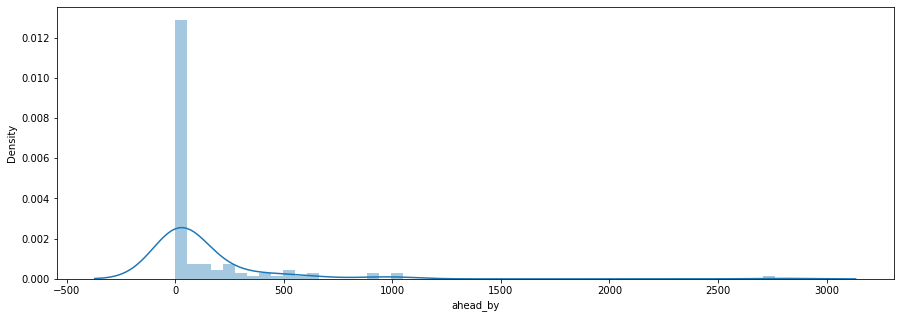

In [61]:
sns.distplot(tags_final.ahead_by)

In [62]:
tags_final["diff_dates"] = tags_final.to_date - tags_final.from_date
tags_final["diff_days"] = tags_final.diff_dates / np.timedelta64(1, "D")

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff_days', ylabel='Density'>

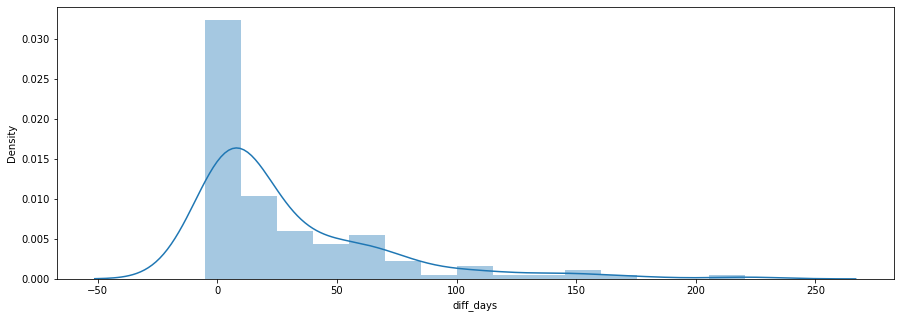

In [63]:
sns.distplot(tags_final.diff_days)

In [64]:
tags_final.sort_values(by = "diff_days", ascending=False).head(10)[columns_subset+["diff_days"]]

,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha,diff_days
1201,5.6.6,5.6.7,10,0,05221592672b903c703c0424dc77458e615c106d,3de1bdeb3255fedc75885313205143f28aa89e9c,220.591933
2296,4.5.6,4.5.7,7,0,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,175.175938
144,7.9.1,7.9.2,19,0,6818fad17ba67e97d395a8488d5412e00892d5e1,5832fefc31f5ba25f15b3fa66ed816f7b87fd835,152.030058
325,6.7.6,6.7.7,12,0,302f75de1ec5df6e983970f3c76b86ee02b1cd26,4aa6d928f960303eb990d50c275513a517c85e69,147.990856
2321,7.4,7.5,657,0,86937350807da2beb38dcd4216eafea0009fb99f,cb851ba202973bd468e070572c1e3b0b0437d2f4,136.566146
73,7.9.3,7.9.4,14,0,898a79cc7df01a9603c17f92b93e46ec62bc77d2,2f8d99a55899105cbf3e3170194c614c2a6ea4d7,121.285220
113,7.9,8.0,415,1,6502ec4ffee7e5a57498baaf330b80eb490d01c2,87ca68d63f4afd37d74b2f454430dfde9e862c6a,106.013032
92,7.9.2,7.9.3,11,0,5832fefc31f5ba25f15b3fa66ed816f7b87fd835,898a79cc7df01a9603c17f92b93e46ec62bc77d2,105.781678
344,6.7.5,6.7.6,16,0,ec8ab77fa180a9edaf664075e8e76ae0b4a2d9f1,302f75de1ec5df6e983970f3c76b86ee02b1cd26,105.232002
211,7.7,7.8,509,0,69bc562d207053ef21afd12c8bc9c5217b50227a,870ae4efbf5dcdbe59295eb5827b55a6a74c7b89,90.693657


In [65]:
tags_final.sort_values(by = "diff_days", ascending=False).tail(10)[columns_subset+["diff_days"]]

,from_tag,to_tag,ahead_by,behind_by,from_sha,to_sha,diff_days
1467,5.5-M12,5.5-M13,7,0,4aa44f864269fb77e1e57c54e15ba913359d383d,c6c159847040bd5183c9ceb1df80553c6b2f3396,1.075613
1624,5.5-M2,5.5-M3,6,0,1792451e5e318a0cfb2e0085115d4c68f8025828,c096255c9f57d03a70e02fd99ba06e9e0d737fc3,1.059537
2040,5.4-M5,5.4-M6,15,0,0ad061c6a5c6a0e1c84511b1a2eb7db2f6764e35,868e4d9403268e0f17235e1993496e92cb8883be,1.031898
2115,5.3-RC3,5.3,2,0,e735681d1b11ff0e90c254a3b5302e290ffa05a6,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,0.868368
2209,5.2-RC1,5.2-RC2,4,0,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,0.755336
553,6.5-RC2,6.5-M4,1,0,fa58d92ea7145838c8030fc4611a4bdefe94b5de,4815ccb899b0cff352dd979024afd46db878b692,0.043843
590,6.5-RC1,6.5-M3,1,0,3861f8769afa40e556c63ff7f39a41f9f89f68fa,ca28dd4ed34ab7c6e6066dd44820fe815c21b7a8,0.031470
1998,5.4-M6,5.4-M7,5,0,868e4d9403268e0f17235e1993496e92cb8883be,366217e521da38a4b17f7e6ada0f4d6612475580,-0.932211
1669,5.4-RC2,5.5-M1,36,1,e8f951d9f2a99975e31f82d97fce68f47e9242d3,8909ccd99b9bc5874f24395519d66e2bcb9bdacb,-2.996412
1188,5.6.1,6.0-RC1,450,2,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,41affbb82c5e897eea64f77538ce4b20322ba61c,-4.988113


In [66]:
tags_final[tags_final.ahead_by > 250]

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date,ahead_behind_sum,diff_dates,diff_days
2226,5.1.2,2015-07-27 08:03:21,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,2762,0,5.2-RC1,2015-10-12 15:58:42,2762,77 days 07:55:21,77.330104
2172,5.2,2015-11-02 08:56:19,f045be98be3ba032b6b19d71574038eeeb91803b,c979578645aaf77c447b250136db32a7067619a1,513,0,5.3-RC1,2015-12-09 12:47:34,513,37 days 03:51:15,37.160590
1372,5.5,2016-05-02 14:09:29,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,a28bb3e5d6988747f1bcd7896be07a6afe56914f,318,0,5.6-RC1,2016-05-20 11:21:25,318,17 days 21:11:56,17.883287
1188,5.6.1,2016-07-25 08:13:12,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,41affbb82c5e897eea64f77538ce4b20322ba61c,450,2,6.0-RC1,2016-07-20 08:30:19,452,-5 days +00:17:07,-4.988113
1105,6.0,2016-08-03 09:19:42,8fd98eebd4c693bedae9c2ce45d6edc9ff2830fa,12e24a98549f51fc560d782a9d93164021feaccc,564,0,6.1-RC1,2016-09-19 14:58:22,564,47 days 05:38:40,47.235185
1044,6.1.1,2016-11-17 19:45:38,6a70cefe40b1b8127eb4e7ef3436a5c43fe938b4,e50f57556a830a9d0d527f68e6c106192acaa4b9,627,0,6.2-RC1,2016-11-21 11:08:08,627,3 days 15:22:30,3.640625
873,6.2.1,2017-01-16 16:00:20,8a667b2e3358144ea6d0affaf7673ebd290b0b78,534fc279a64c7b836f39d476d15192999944b9eb,936,0,6.3.0.18401,2017-02-14 11:06:25,936,28 days 19:06:05,28.795891
874,6.2.1,2017-01-16 16:00:20,8a667b2e3358144ea6d0affaf7673ebd290b0b78,534fc279a64c7b836f39d476d15192999944b9eb,936,0,6.3-RC1,2017-02-14 11:06:25,936,28 days 19:06:05,28.795891
731,6.3.2,2017-04-24 08:51:14,84ad17dd4e53eae1221d1af96fb45d8997f2e2fa,04b7bf3ccc22daea116a67e6ba174237805e5ccf,1001,0,6.4-RC1,2017-05-16 15:00:32,1001,22 days 06:09:18,22.256458
515,6.5,2017-08-01 11:58:54,ef2ca5b33e5795b841d45e0b20fef3cb90391719,868e9ce285262e5277c158ea3c2082c379e81943,1046,0,6.6-RC1,2017-10-10 17:03:23,1046,70 days 05:04:29,70.211447


In [67]:
len(tags_final)

121

In [68]:
def retrieve_date_for_sha(sha):
    lines = git.show("--pretty=fuller", sha, "--date=format:'%Y-%m-%d %H:%M:%S'").split("\n")
    for line in lines:
        if "CommitDate" in line:
            commit_date = line
            st = commit_date.split(": ")[1]
            return st[st.find("'")+1:st.find("''")]
    return None

In [69]:
tags_final["from_date_new"] = tags_final.from_sha.apply(retrieve_date_for_sha)
tags_final["to_date_new"] = tags_final.to_sha.apply(retrieve_date_for_sha)
tags_final.from_date_new = pd.to_datetime(tags_final.from_date_new)
tags_final.to_date_new = pd.to_datetime(tags_final.to_date_new)

In [70]:
tags_final = tags_final.rename(columns={
    "from_date":"from_author_date",
    "to_date":"to_author_date",
    "from_date_new":"from_commit_date",
    "to_date_new":"to_commit_date",
    "diff_dates":"diff_author_dates",
    "diff_days":"diff_author_days",
})

In [71]:
tags_final["diff_commit_dates"] = tags_final.to_commit_date - tags_final.from_commit_date
tags_final["diff_commit_days"] = tags_final.diff_commit_dates / np.timedelta64(1, "D")

In [72]:
#tags_final.to_csv(f"{csv_folder}/tags_comparison_final_updated.csv")
tags_final = pd.read_csv(f"{csv_folder}/tags_comparison_final_updated.csv", index_col=0)
tags_final

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
2307,4.5.5,2015-07-30 10:02:58,cc8a9472c671598fb3158b51b15863448a477a50,12d931e5a31e1692a428bbb34ba11cd63aebf998,16,0,4.5.6,2015-10-16 09:31:18,16,77 days 23:28:20,77.978009,2015-07-30 12:02:58,2015-10-16 11:31:18,77 days 23:28:20,77.978009
2296,4.5.6,2015-10-16 09:31:18,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,0,4.5.7,2016-04-08 13:44:39,7,175 days 04:13:21,175.175938,2015-10-16 11:31:18,2016-04-08 15:44:39,175 days 04:13:21,175.175938
2257,5.1,2015-04-02 08:09:45,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,0,5.1.1,2015-06-02 08:34:06,7,61 days 00:24:21,61.016910,2015-04-02 10:09:45,2015-06-02 10:34:06,61 days 00:24:21,61.016910
2271,5.1-RC2,2015-03-23 15:22:47,dfc9f94b72103ee941cc11da6529623fa91df509,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,17,0,5.1,2015-04-02 08:09:45,17,9 days 16:46:58,9.699282,2015-03-23 16:22:47,2015-04-02 10:09:45,9 days 17:46:58,9.740949
2242,5.1.1,2015-06-02 08:34:06,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,0,5.1.2,2015-07-27 08:03:21,12,54 days 23:29:15,54.978646,2015-06-02 10:34:06,2015-07-27 10:03:21,54 days 23:29:15,54.978646
2226,5.1.2,2015-07-27 08:03:21,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,2762,0,5.2-RC1,2015-10-12 15:58:42,2762,77 days 07:55:21,77.330104,2015-07-27 10:03:21,2015-10-12 17:58:42,77 days 07:55:21,77.330104
2172,5.2,2015-11-02 08:56:19,f045be98be3ba032b6b19d71574038eeeb91803b,c979578645aaf77c447b250136db32a7067619a1,513,0,5.3-RC1,2015-12-09 12:47:34,513,37 days 03:51:15,37.160590,2015-11-02 09:56:19,2015-12-09 13:47:34,37 days 03:51:15,37.160590
2209,5.2-RC1,2015-10-12 15:58:42,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,4,0,5.2-RC2,2015-10-13 10:06:23,4,0 days 18:07:41,0.755336,2015-10-12 17:58:42,2015-10-13 12:06:23,0 days 18:07:41,0.755336
2191,5.2-RC2,2015-10-13 10:06:23,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,ef358b002383f918448dcb5e8ac40b64a35a4c26,56,0,5.2-RC3,2015-10-20 13:47:33,56,7 days 03:41:10,7.153588,2015-10-13 12:06:23,2015-10-20 15:47:33,7 days 03:41:10,7.153588
2153,5.3-RC1,2015-12-09 12:47:34,c979578645aaf77c447b250136db32a7067619a1,29a84111f6cc9298f83df515830ff40a41d0976c,40,1,5.3-RC2,2015-12-17 16:02:01,41,8 days 03:14:27,8.135035,2015-12-09 13:47:34,2015-12-17 17:02:01,8 days 03:14:27,8.135035


### Commits difference between tags

In [73]:
import git
git = git.Git("../../../sonarqube/") 

In [100]:
from_tag = "5.1.1"
to_tag = "5.1.2"
tags_comparison_shas = {}
for i, row in tags_final.iterrows():
    shas = []
    for commit in git.log("--pretty=oneline", "--right-only", f"{row.from_sha}...{row.to_sha}").split("\n"):
        sha = commit.split(" ")[0]
        shas.append(sha)
    if(len(shas) != (row.ahead_by)):
        print(f"{row.from_tag}...{row.to_tag} Mismatch in commits retrieved and ahead_by! {len(shas)} and {row.ahead_by}")
        print(shas)
        break
    tags_comparison_shas[f"{row.from_tag}...{row.to_tag}"] = shas

In [101]:
tags_final["commits_difference"] = None

In [110]:
data = []
for key in tags_comparison_shas:
    from_tag = key.split("...")[0]
    to_tag = key.split("...")[1]
    for commit in tags_comparison_shas[key]:
        data.append((from_tag, to_tag, commit))
tags_comparison_commits = pd.DataFrame(data, columns=["from_tag", "to_tag", "ahead_sha"])
tags_comparison_commits

,from_tag,to_tag,ahead_sha
0,4.5.5,4.5.6,12d931e5a31e1692a428bbb34ba11cd63aebf998
1,4.5.5,4.5.6,22de220614124b30454d413d63b3dcc2b624c126
2,4.5.5,4.5.6,bf1c76e6ea1dcf89418c5def929218672880c6d7
3,4.5.5,4.5.6,814bcf7e99ae67567cc2e879925d882e5035cbd8
4,4.5.5,4.5.6,fc8a153c0c2f57daef9abbb66f5854a787fe268d
...,...,...,...
16577,8.4.0.35506,8.4.1.35646,08e36b12704d8ac30f56d3d5ecf73d5457424b5c
16578,8.4.1.35646,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a
16579,8.4.1.35646,8.4.2.36762,ed1a72601c559e86ccd96004c99157421b6bcb20
16580,8.4.1.35646,8.4.2.36762,7721c3eeab3202e91fb9c87dfaec4ba3a7b4d0df
